In [1]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 8.5 MB/s eta 0:00:00


In [2]:
import requests

import pandas as pd
import io

url = "https://github.com/WSU-SEAL/ToxiCR/raw/master/models/code-review-dataset-full.xlsx"

response = requests.get(url)
response.raise_for_status()

df = pd.read_excel(io.BytesIO(response.content))

display(df.head())

,message,is_toxic
0,This and below assignments also should be removed,0
1,this should be flavor_id = self.flavor_id,0
2,bool session_adopted_ = false;,0
3,"nit: Starting C++11, this could be done direct...",0
4,I am confused.\n \n This is the tar process we...,0


In [3]:
count_of_zeros = df['is_toxic'].value_counts().get(0, 0)

total_rows = len(df)

percentage_of_zeros = (count_of_zeros / total_rows) * 100 if total_rows > 0 else 0

print(f"Number of 0s in the 'is_toxic' column: {count_of_zeros}")
print(f"Percentage of 0s in the 'is_toxic' column: {percentage_of_zeros:.2f}%")

Number of 0s in the 'is_toxic' column: 15894
Percentage of 0s in the 'is_toxic' column: 80.88%


In [4]:
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk
import re

nltk.download('punkt_tab')

stemmer = PorterStemmer()

df['message'] = df['message'].astype(str).replace(np.nan, '')

df['message'] = df['message'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x, flags=re.MULTILINE))

df['message'] = df['message'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', ' ', x))

df['message'] = df['message'].apply(lambda x: re.sub(r'(.)\1+', r'\1', x))

df['message'] = df['message'].apply(lambda x: re.sub(r'([a-zA-Z]+)\1+', r'\1', x))

df['message'] = df['message'].apply(lambda x: " ".join([stemmer.stem(word) for word in word_tokenize(x) if len(word) > 1]))

display(df.head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,message,is_toxic
0,thi and below asign also should be remov,0
1,thi should be flavor id self flavor id,0
2,bol sesion adopt fals,0
3,nit start thi could be done directli in the de...,0
4,am confus thi is the tar proce we are check if...,0


In [5]:
print(f"Shape of the DataFrame before removing duplicates: {df.shape}")

df.drop_duplicates(inplace=True)

print(f"Shape of the DataFrame after removing duplicates: {df.shape}")

display(df.head())

Shape of the DataFrame before removing duplicates: (19651, 2)
Shape of the DataFrame after removing duplicates: (12704, 2)


,message,is_toxic
0,thi and below asign also should be remov,0
1,thi should be flavor id self flavor id,0
2,bol sesion adopt fals,0
3,nit start thi could be done directli in the de...,0
4,am confus thi is the tar proce we are check if...,0


In [6]:
message_array = df['message'].to_numpy()
label_array = df['is_toxic'].to_numpy()

print(message_array[2270:2280])
print(label_array[:5])

['same here wonder if thi valu should be comput by pupet facter'
 'if you are tri to set thi to fals and you suce at chang the sete but not at kile the daemon should you fail the updat engin wil not share new file nor tri to consum them but the daemon wil stil be rune until next rebot'
 'becaus want to move munmap oper out of the race region of thread list lock'
 'duplic htp should be remov' 'uid uid' 'thi should be ace ip'
 'pleas kil that leftov line'
 'the modal id is the same for manageqosspecasociationview we should chang it to someth els'
 'think we can kil thi use jsonpath rw ext'
 'same as befor we should probabl remov user name and such from these file']
[0 0 0 0 0]


In [7]:
from sklearn.model_selection import train_test_split

x_train_index, x_test_index, y_train_index, y_test_index = train_test_split([i for i in range(len(message_array))], [i for i in range(len(label_array))], test_size=0.15, random_state=42)

print("Data split into training and testing sets.")
print(f"Shape of X_train: {len(x_train_index)}")
print(f"Shape of X_test: {len(x_test_index)}")
print(f"Shape of y_train: {len(y_train_index)}")
print(f"Shape of y_test: {len(y_test_index)}")

Data split into training and testing sets.
Shape of X_train: 10798
Shape of X_test: 1906
Shape of y_train: 10798
Shape of y_test: 1906


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(message_array)


feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()[0]

sorted_keywords = [word for _, word in sorted(zip(tfidf_scores, feature_names), reverse=True)]

print("Ключевые слова:", sorted_keywords)

print(sorted_keywords.index("fuck"))
print(sorted_keywords[2500])
print(len(sorted_keywords))

print(f"Shape of tfidf_matrix: {tfidf_matrix.shape}")

Ключевые слова: ['asign', 'below', 'also', 'remov', 'should', 'and', 'be', 'thi', 'zygot', 'zx', 'zul', 'zu', 'zsh', 'zopfli', 'zoneofsettransit', 'zonemanag', 'zoneinfo', 'zonefil', 'zone', 'zomg', 'zombi', 'zom', 'zokep', 'zmq', 'zlib', 'zipoutputstream', 'zipinputstream', 'zipfiletest', 'zipfil', 'zip', 'zinger', 'zilion', 'zier', 'zhiyan', 'zhang', 'zh', 'zeuthen', 'zeromq', 'zero', 'zer', 'zd', 'zconf', 'zbf', 'zaqar', 'zap', 'zaloc', 'zabixmanag', 'zabix', 'za', 'yuzhu', 'yuv', 'yup', 'yum', 'yuk', 'yuckn', 'yuckier', 'yucki', 'yuck', 'yuan', 'yoyu', 'yourself', 'your', 'young', 'youl', 'you', 'yo', 'ymv', 'yml', 'ymetric', 'yike', 'yield', 'yiadr', 'yhirano', 'yet', 'yesterday', 'yest', 'yesh', 'yep', 'yel', 'yeh', 'year', 'yeap', 'yeah', 'yea', 'ye', 'yaya', 'yay', 'yar', 'yaql', 'yapf', 'yank', 'yan', 'yamoto', 'yamlutil', 'yamleror', 'yaml', 'yamauchi', 'yagni', 'yada', 'ya', 'xz', 'xy', 'xusb', 'xtremiovolumedriv', 'xtremio', 'xtransfer', 'xtrabackup', 'xrtestrequir', 'xref'

In [9]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import numpy as np

tfidf_matrix_train = tfidf_matrix[x_train_index]
label_array_train = label_array[y_train_index]

print(tfidf_matrix_train.shape)

kf = KFold(n_splits=10, shuffle=True, random_state=33)

f1_scores = []

for fold, (train_index, test_index) in enumerate(kf.split(tfidf_matrix_train)):
    print(f"Processing Fold {fold + 1}")

    X_train, X_test = tfidf_matrix_train[train_index], tfidf_matrix_train[test_index]
    y_train, y_test = label_array_train[train_index], label_array_train[test_index]

    model = LogisticRegression(solver='saga', penalty = 'elasticnet', l1_ratio=1, class_weight='balanced') # Use LogisticRegression
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)
    print(f"F1 Score for Fold {fold + 1}: {f1}")

average_f1_score = np.mean(f1_scores)
print(f"\nAverage F1 Score across 10 Folds: {average_f1_score}")

(10798, 11152)
Processing Fold 1
F1 Score for Fold 1: 0.7595628415300546
Processing Fold 2
F1 Score for Fold 2: 0.8057851239669421
Processing Fold 3
F1 Score for Fold 3: 0.75
Processing Fold 4
F1 Score for Fold 4: 0.7488789237668162
Processing Fold 5
F1 Score for Fold 5: 0.7717647058823529
Processing Fold 6
F1 Score for Fold 6: 0.8043478260869565
Processing Fold 7
F1 Score for Fold 7: 0.7982062780269058
Processing Fold 8
F1 Score for Fold 8: 0.7593818984547461
Processing Fold 9
F1 Score for Fold 9: 0.7860262008733624
Processing Fold 10
F1 Score for Fold 10: 0.8084210526315789

Average F1 Score across 10 Folds: 0.7792374851219714


In [10]:
y_test_pred = model.predict(tfidf_matrix[x_test_index])

f1 = f1_score(label_array[y_test_index], y_test_pred)
print(f"F1 Score: {f1}")

F1 Score: 0.7730870712401056


In [11]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

precision, recall, f1, support = precision_recall_fscore_support(label_array[y_test_index], y_test_pred, average='binary')

accuracy = accuracy_score(label_array[y_test_index], y_test_pred)

print(f"Precision on the test set: {precision}")
print(f"Recall on the test set: {recall}")
print(f"F1 Score on the test set: {f1}")
print(f"Support on the test set: {support}")
print(f"Accuracy on the test set: {accuracy}")

Precision on the test set: 0.7493606138107417
Recall on the test set: 0.7983651226158038
F1 Score on the test set: 0.7730870712401056
Support on the test set: None
Accuracy on the test set: 0.9097586568730325


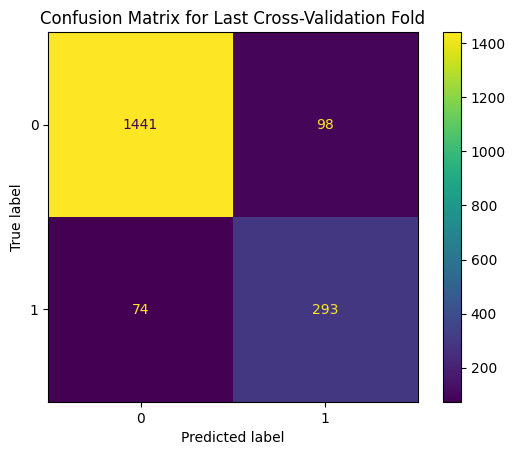

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(label_array[y_test_index], y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()

plt.title('Confusion Matrix for Last Cross-Validation Fold')
plt.show()

In [13]:
!pip install transformers

In [14]:
from transformers import RobertaTokenizer

tokenizer = RobertaTokenizer.from_pretrained("microsoft/codebert-base")

tokenized_messages = tokenizer(df['message'].tolist(), padding=True, truncation=True, max_length=514, return_tensors="pt")

print("Keys in tokenized output:", tokenized_messages.keys())
print("Shape of input_ids:", tokenized_messages['input_ids'].shape)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

Keys in tokenized output: KeysView({'input_ids': tensor([[    0,   212,   118,  ...,     1,     1,     1],
        [    0,   212,   118,  ...,     1,     1,     1],
        [    0, 18217,   579,  ...,     1,     1,     1],
        ...,
        [    0, 26732,  5673,  ...,     1,     1,     1],
        [    0, 12338,  2916,  ...,     1,     1,     1],
        [    0,  7424,  2067,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])})
Shape of input_ids: torch.Size([12704, 514])


In [15]:
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 8.2 MB/s eta 0:00:00


In [16]:
import torch
from imblearn.over_sampling import RandomOverSampler
import numpy as np

input_ids_np = tokenized_messages['input_ids'].numpy()[x_train_index]
attention_mask_np = tokenized_messages['attention_mask'].numpy()[x_train_index]

X_combined = np.hstack((input_ids_np, attention_mask_np))


ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_combined, label_array[y_train_index])

split_point = input_ids_np.shape[1]
input_ids_resampled = X_resampled[:, :split_point]
attention_mask_resampled = X_resampled[:, split_point:]

tokenized_messages_resampled = {
    'input_ids': torch.tensor(input_ids_resampled, dtype=torch.long),
    'attention_mask': torch.tensor(attention_mask_resampled, dtype=torch.long)
}
label_array_resampled = y_resampled

print(f"Shape of resampled input_ids: {tokenized_messages_resampled['input_ids'].shape}")
print(f"Shape of resampled labels: {label_array_resampled.shape}")

unique_labels, counts = np.unique(label_array_resampled, return_counts=True)
print("Distribution of resampled labels:", dict(zip(unique_labels, counts)))

Shape of resampled input_ids: torch.Size([17372, 514])
Shape of resampled labels: (17372,)
Distribution of resampled labels: {np.int64(0): np.int64(8686), np.int64(1): np.int64(8686)}


In [17]:
import torch
from torch.utils.data import Dataset

class CodeReviewDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

dataset = CodeReviewDataset(tokenized_messages, label_array)

print(f"Dataset length: {len(dataset)}")
print("Example item:", dataset[5])

Dataset length: 12704
Example item: {'input_ids': tensor([    0,   219,  5858,   304,    61, 27487,   109,  3553,   118,    55,
        38971,   118,     2,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,

/tmp/ipython-input-1039766556.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


In [18]:
from sklearn.model_selection import train_test_split

train_dataset, eval_dataset = train_test_split(dataset, test_size=0.1, random_state=42)

print(f"Length of training dataset: {len(train_dataset)}")
print(f"Length of validation dataset: {len(eval_dataset)}")

/tmp/ipython-input-1039766556.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Length of training dataset: 11433
Length of validation dataset: 1271


In [19]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("microsoft/codebert-base", num_labels=2)

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at microsoft/codebert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Define trainingarguments

### Subtask:
Specify the training parameters such as epochs, batch size, learning rate, and evaluation strategy.


**Reasoning**:
Import the TrainingArguments class and instantiate it with the specified parameters.



**Reasoning**:
The previous attempt failed because 'evaluation_strategy' is not a valid argument for TrainingArguments. I will fix this by using the correct argument 'eval_strategy'.



In [20]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    learning_rate=25e-6,
    num_train_epochs=10,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    logging_dir='./logs',
    logging_steps=5000,
    report_to="none",
    optim="adamw_torch"
)

print(training_args)

TrainingArguments(
_n_gpu=0,
accelerator_config={'split_batches': False, 'dispatch_batches': None, 'even_batches': True, 'use_seedable_sampler': True, 'non_blocking': False, 'gradient_accumulation_kwargs': None, 'use_configured_state': False},
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
average_tokens_across_devices=True,
batch_eval_metrics=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_persistent_workers=False,
dataloader_pin_memory=True,
dataloader_prefetch_factor=None,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_do_concat_batches=True,
eval_on_start=False,
eval_steps=None,
eval_strategy=IntervalStrategy.EPOCH,
eval_use_gather_object=False,

In [21]:
from transformers import Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

def compute_metrics(p):
    predictions = p.predictions[0] if isinstance(p.predictions, tuple) else p.predictions
    preds = np.argmax(predictions, axis=1)
    precision, recall, f1, support = precision_recall_fscore_support(p.label_ids, preds, average='binary')
    acc = accuracy_score(p.label_ids, preds)
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'support' : support
    }

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

In [22]:
trainer.train()

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Support
1,No log,0.264404,0.892211,0.684211,0.805785,0.740038,None
2,No log,0.234727,0.905586,0.716312,0.834711,0.770992,None
3,No log,0.314540,0.917388,0.807175,0.743802,0.774194,None
4,No log,0.335781,0.915028,0.810185,0.723140,0.764192,None
5,No log,0.427999,0.920535,0.830986,0.731405,0.778022,None
6,No log,0.532353,0.911094,0.779221,0.743802,0.761099,None
7,0.150100,0.494115,0.910307,0.793578,0.714876,0.752174,None
8,0.150100,0.522022,0.911880,0.764228,0.776860,0.770492,None
9,0.150100,0.561501,0.922109,0.832558,0.739669,0.783370,None
10,0.150100,0.608707,0.916601,0.809091,0.735537,0.770563,None


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument i

TrainOutput(global_step=7150, training_loss=0.11772730260462194, metrics={'train_runtime': 1947.478, 'train_samples_per_second': 58.743, 'train_steps_per_second': 3.671, 'total_flos': 3.01989927677436e+16, 'train_loss': 0.11772730260462194, 'epoch': 10.0})

In [23]:
class TestDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

test_encodings = {
    'input_ids': torch.tensor(tokenized_messages['input_ids'].numpy()[x_test_index]),
    'attention_mask': torch.tensor(tokenized_messages['attention_mask'].numpy()[x_test_index])
}
test_labels = label_array[y_test_index]

test_dataset = TestDataset(test_encodings, test_labels)


predictions = trainer.predict(test_dataset)

y_test_pred = np.argmax(predictions.predictions, axis=1)

f1 = f1_score(test_labels, y_test_pred)
print(f"F1 Score on the test set: {f1}")

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


F1 Score on the test set: 0.848314606741573


In [24]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

precision, recall, f1, support = precision_recall_fscore_support(test_labels, y_test_pred, average='binary')

accuracy = accuracy_score(test_labels, y_test_pred)

print(f"Precision on the test set: {precision}")
print(f"Recall on the test set: {recall}")
print(f"F1 Score on the test set: {f1}")
print(f"Support on the test set: {support}")
print(f"Accuracy on the test set: {accuracy}")

Precision on the test set: 0.8753623188405797
Recall on the test set: 0.8228882833787466
F1 Score on the test set: 0.848314606741573
Support on the test set: None
Accuracy on the test set: 0.9433368310598111


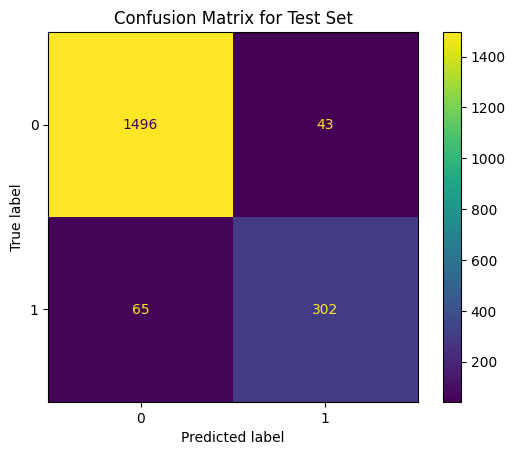

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1]) # Assuming labels are 0 and 1
disp.plot()

plt.title('Confusion Matrix for Test Set')
plt.show()